# <center>DETECTION OF PHISHING WEBSITES USING ML

---

In the previous notebook, we extracted features from the dataset which we collected. Now, the objective of this project is to train machine learning models and deep neural nets on the dataset which we created in another notebook to predict phishing websites. After that the performance of each model is measured and compared with other models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.Loading the dataset:

In [2]:
df = pd.read_csv('finaldata.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [3]:
legit_url = pd.read_csv('legitimate.csv')
phish_url = pd.read_csv('phishing.csv')

In [4]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
df.shape

(9719, 18)

In [6]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,9719.0,9719.000000,9719.000000,9719.000000,9719.000000,9719.0,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.000000,9719.00000
mean,0.0,0.026855,0.712110,2.527112,0.015948,0.0,0.106698,0.126042,0.065542,0.836712,0.550057,0.854100,0.132112,0.120280,0.999897,0.160099,0.49254
std,0.0,0.161667,0.452803,2.133452,0.125281,0.0,0.308745,0.331914,0.247492,0.369648,0.497514,0.353024,0.338630,0.325305,0.010144,0.366717,0.49997
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000
max,0.0,1.000000,1.000000,18.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


* The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns.

In [7]:
df.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9719 entries, 0 to 9718
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         9719 non-null   object
 1   Have_IP        9719 non-null   int64 
 2   Have_At        9719 non-null   int64 
 3   URL_Length     9719 non-null   int64 
 4   URL_Depth      9719 non-null   int64 
 5   Redirection    9719 non-null   int64 
 6   https_Domain   9719 non-null   int64 
 7   TinyURL        9719 non-null   int64 
 8   Prefix/Suffix  9719 non-null   int64 
 9   DNS_Record     9719 non-null   int64 
 10  Web_Traffic    9719 non-null   int64 
 11  Domain_Age     9719 non-null   int64 
 12  Domain_End     9719 non-null   int64 
 13  iFrame         9719 non-null   int64 
 14  Mouse_Over     9719 non-null   int64 
 15  Right_Click    9719 non-null   int64 
 16  Web_Forwards   9719 non-null   int64 
 17  Label          9719 non-null   int64 
dtypes: int64(17), object(1)
memo

## 2.Visualizing the data:

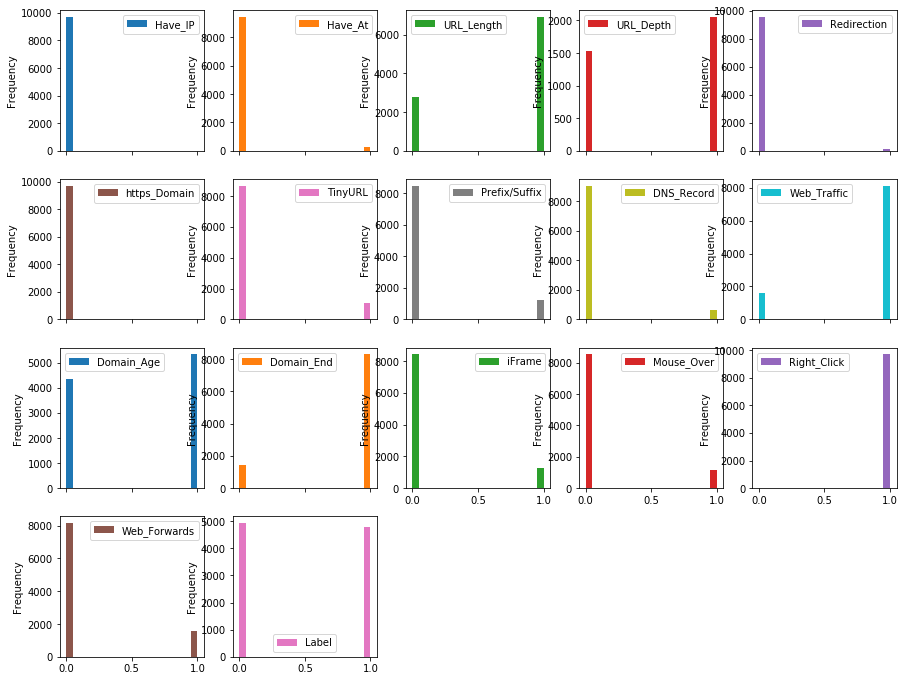

In [9]:
df.plot.hist(subplots=True,layout=(5,5),figsize=(15, 15), range=(0,1), bins=20)
plt.show()

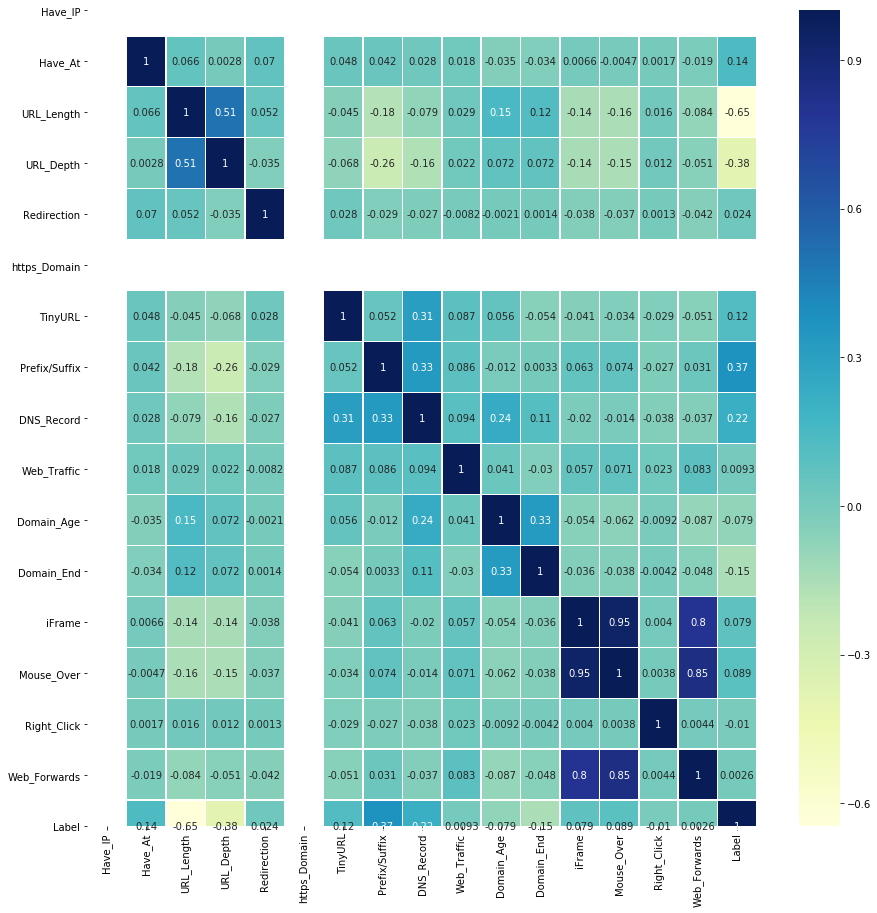

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5)
#plt.savefig('corr.png')

In [11]:
#phish_url['URL_Depth'].value_counts().sort_index().plot(kind='barh', figsize=(10,7), color='c')

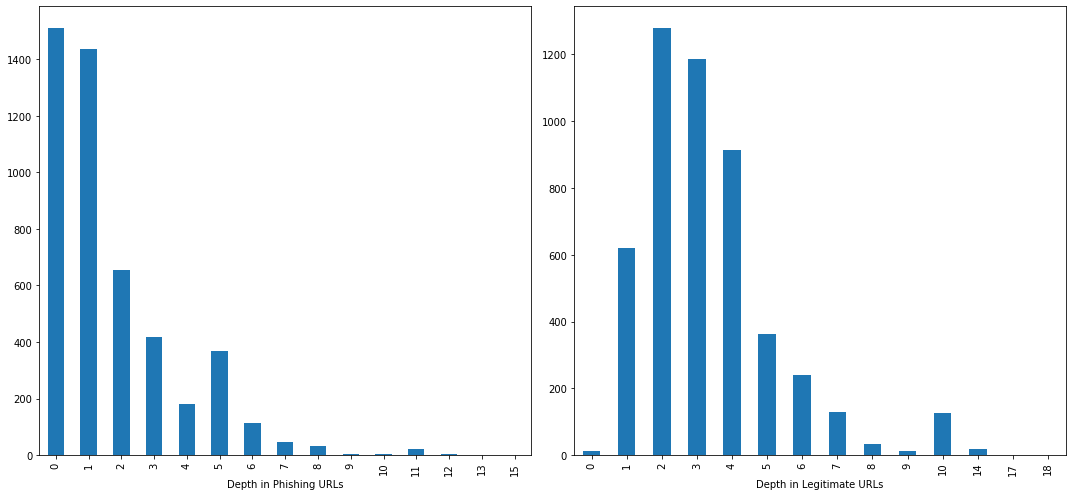

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
phish_url['URL_Depth'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Depth in Phishing URLs')
plt.subplot(1,2,2)
legit_url['URL_Depth'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Depth in Legitimate URLs')
plt.tight_layout()

* Clearly, we can see that phishing URLs has very few depth compared to legitimate URLs.

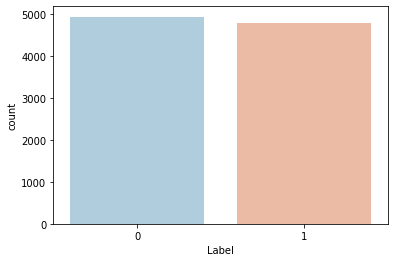

In [16]:
sns.countplot(x='Label',data=df,palette='RdBu_r')

* We have around 5000 phishing and 5000 legitimate URLs.
* So from above plot we can see that we have balanced data.

## 3.Data Preprocessing:

* The Domain column doesn't have any significance to the machine learning model training. So we are dropping the 'Domain' column from the dataset.

In [17]:
df2 = df.drop(['Domain'], axis = 1).copy()

* Now, we have 16 features left.
* In the previous notebook we extracted features and created a final dataset in which top half rows were legitimate URLs and bottom half where phishing URLs.
* For even distribution while splitting the data into training and testing sets, we need to shuffle it.

In [18]:
df3 = df2.sample(frac=1).reset_index(drop=True)
df3.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,0,4,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,1,2,0,0,0,0,0,1,0,0,1,1,1,1,1
4,0,0,1,4,0,0,0,1,0,1,0,0,1,1,1,1,1


* Now data is throughly preprocessed and ready for training.

## 4.Spliting into training and testing

In [20]:
X = df3.drop('Label',axis=1)
y = df3['Label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=10)

In [22]:
X_train.shape, X_test.shape

((7775, 16), (1944, 16))

## 5.Model Building

In [23]:
accuracies = {}

In [24]:
def find_accuracy(classifier, pred):
    print("Accuracy Score:")
    print(accuracy_score(y_test, pred))

    print("\nConfusion Matrix: ")
    print(confusion_matrix(y_test, pred))

    print("\nClassification Report: ")
    print(classification_report(y_test, pred))
    
    accuracies[classifier] = accuracy_score(y_test, pred)*100

### 5.1.Logistic Regression:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

find_accuracy('Logistic Regression', lr_pred)

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score:
0.8662551440329218

Confusion Matrix: 
[[988  12]
 [248 696]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1000
           1       0.98      0.74      0.84       944

    accuracy                           0.87      1944
   macro avg       0.89      0.86      0.86      1944
weighted avg       0.89      0.87      0.86      1944



### 5.2.K-Nearest Neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

find_accuracy('KNN', knn_pred)

Accuracy Score:
0.8842592592592593

Confusion Matrix: 
[[919  81]
 [144 800]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1000
           1       0.91      0.85      0.88       944

    accuracy                           0.88      1944
   macro avg       0.89      0.88      0.88      1944
weighted avg       0.89      0.88      0.88      1944



#### Analysing the Error rate with K values

In [29]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

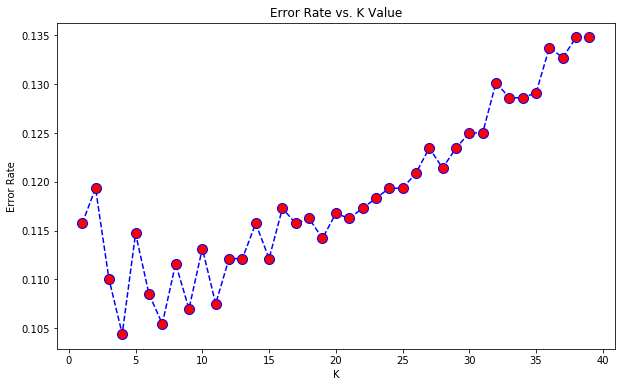

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

* Here we can see that at K=4 error rate is low. Let's retrain the model with that and check the classification report.

In [31]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

find_accuracy('KNN', knn_pred)

Accuracy Score:
0.8955761316872428

Confusion Matrix: 
[[966  34]
 [169 775]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1000
           1       0.96      0.82      0.88       944

    accuracy                           0.90      1944
   macro avg       0.90      0.89      0.89      1944
weighted avg       0.90      0.90      0.89      1944



* We got better accuracy in KNN when we used parameter 'n_neighbors=4' after analysing the error rate with different k values.

### 5.3.Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

find_accuracy('Decision Tree', dtc_pred)

Accuracy Score:
0.8796296296296297

Confusion Matrix: 
[[995   5]
 [229 715]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1000
           1       0.99      0.76      0.86       944

    accuracy                           0.88      1944
   macro avg       0.90      0.88      0.88      1944
weighted avg       0.90      0.88      0.88      1944



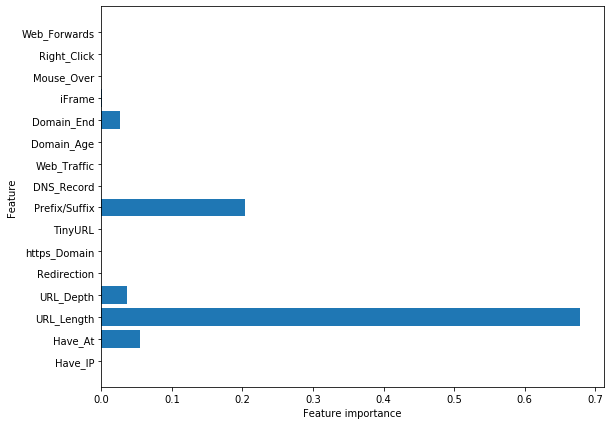

In [34]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), dtc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### 5.4.Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

find_accuracy('Random Forest', rfc_pred)

Accuracy Score:
0.9068930041152263

Confusion Matrix: 
[[953  47]
 [134 810]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1000
           1       0.95      0.86      0.90       944

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



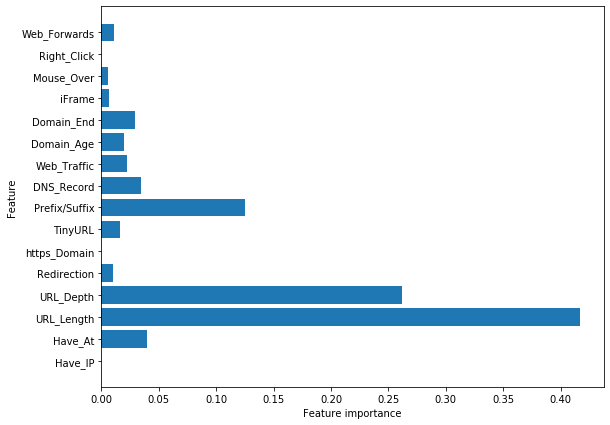

In [37]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### 5.5.Support Vector Machines

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

find_accuracy('SVM', svm_pred)

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.8688271604938271

Confusion Matrix: 
[[987  13]
 [242 702]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1000
           1       0.98      0.74      0.85       944

    accuracy                           0.87      1944
   macro avg       0.89      0.87      0.87      1944
weighted avg       0.89      0.87      0.87      1944



### 5.6.XGBoost Classifier

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

find_accuracy('XGBoost', xgb_pred)

Accuracy Score:
0.9068930041152263

Confusion Matrix: 
[[953  47]
 [134 810]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1000
           1       0.95      0.86      0.90       944

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



### 5.7.Multilayer Perceptrons:

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=([150,100,50]), 
                    max_iter = 300, 
                    activation = 'relu', 
                    solver = 'adam', random_state=1)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

find_accuracy('Multilayer Perceptrons', mlp_pred)

Accuracy Score:
0.9022633744855967

Confusion Matrix: 
[[985  15]
 [175 769]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1000
           1       0.98      0.81      0.89       944

    accuracy                           0.90      1944
   macro avg       0.92      0.90      0.90      1944
weighted avg       0.91      0.90      0.90      1944



### 5.8.Artificial Neural Network

In [44]:
import tensorflow as tf

In [45]:
ann = tf.keras.models.Sequential()

In [46]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
243/243 [==============================] - 2s 2ms/step - loss: 0.6087 - accuracy: 0.7096
Epoch 2/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4423 - accuracy: 0.8124
Epoch 3/100
243/243 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8662
Epoch 4/100
243/243 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8727
Epoch 5/100
243/243 [==============================] - 1s 4ms/step - loss: 0.3181 - accuracy: 0.8683
Epoch 6/100
243/243 [==============================] - 1s 4ms/step - loss: 0.3076 - accuracy: 0.8742
Epoch 7/100
243/243 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8808
Epoch 8/100
243/243 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.8751
Epoch 9/100
243/243 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.8746
Epoch 10/100
243/243 [==============================] - 1s 3ms/step - loss: 0.3043 - accura

In [57]:
ann_pred = ann.predict(X_test)
ann_pred = (ann_pred > 0.5)

find_accuracy('ANN', ann_pred)

Accuracy Score:
0.88940329218107

Confusion Matrix: 
[[983  17]
 [198 746]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1000
           1       0.98      0.79      0.87       944

    accuracy                           0.89      1944
   macro avg       0.91      0.89      0.89      1944
weighted avg       0.90      0.89      0.89      1944



## 5.9.Ensemle Learning

### 5.9.1.Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier

In [59]:
bc = BaggingClassifier(DecisionTreeClassifier(random_state=1))
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)

find_accuracy('Ensemble - Bagging', bc_pred)

Accuracy Score:
0.9084362139917695

Confusion Matrix: 
[[956  44]
 [134 810]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1000
           1       0.95      0.86      0.90       944

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



### 5.9.2.Voting

In [60]:
from sklearn.ensemble import VotingClassifier

In [62]:
estimator = [('lr', lr), ('knn', knn), ('dtc', dtc), ('rfc', rfc), ('svm', svm), ('xgb', xgb), ('mlp', mlp)]
vc = VotingClassifier(estimators=estimator, voting='hard')
vc.fit(X_train,y_train)
vc_pred = vc.predict(X_test)

find_accuracy('Ensemble - Voting', vc_pred)

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.9063786008230452

Confusion Matrix: 
[[964  36]
 [146 798]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1000
           1       0.96      0.85      0.90       944

    accuracy                           0.91      1944
   macro avg       0.91      0.90      0.91      1944
weighted avg       0.91      0.91      0.91      1944



## 6.Comparision of Models

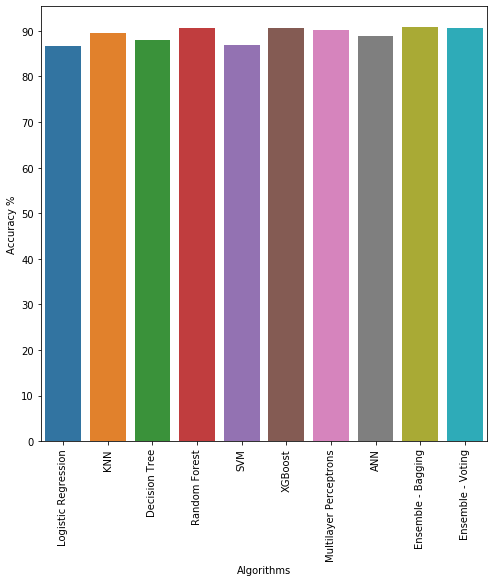

In [63]:
plt.figure(figsize=(8,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

In [64]:
model = []
acc = []
for x in accuracies:
    model.append(x)
    acc.append(accuracies[x])
d = pd.DataFrame({'Model': model, 'Accuracy': acc})
d

,Model,Accuracy
0,Logistic Regression,86.625514
1,KNN,89.557613
2,Decision Tree,87.962963
3,Random Forest,90.689300
4,SVM,86.882716
5,XGBoost,90.689300
6,Multilayer Perceptrons,90.226337
7,ANN,88.940329
8,Ensemble - Bagging,90.843621
9,Ensemble - Voting,90.637860


In [65]:
d.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
8,Ensemble - Bagging,90.843621
3,Random Forest,90.689300
5,XGBoost,90.689300
9,Ensemble - Voting,90.637860
6,Multilayer Perceptrons,90.226337
1,KNN,89.557613
7,ANN,88.940329
2,Decision Tree,87.962963
4,SVM,86.882716
0,Logistic Regression,86.625514


* From above comparison, we can see that Ensemble Learning works well with this dataset.
* Bagging Classifier gave better detection accuracy of 90.84 in comparison with all other algorithms.

In [68]:
# import pickle
# pickle.dump(bc, open("BaggingClassifier.pickle.dat", "wb"))

In [70]:
import pickle
with open('BaggingClassifier.pickle','wb') as f:
    pickle.dump(bc,f)

In [74]:
with open('BaggingClassifier.pickle', 'rb') as f:
        pred = pickle.load(f)

In [80]:
pred

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [83]:
x = np.array([0,0,0,4,0,0,0,0,0,1,0,1,0,0,1,0])
ans = pred.predict([x])
print(ans[0])

1


In [71]:
# from sklearn.externals import joblib
# joblib.dump(bc, 'finalmodel_joblib')

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['finalmodel_joblib']